## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df= pd.read_csv("C:\\Users\\Sarrang\\FindDefault\\transformed_data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
len(df)

284807

In [6]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

C:\Users\Sarrang9\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Sarrang9\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Sarrang9\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Sarrang9\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Sarrang9\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [7]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 227454, number of negative: 226896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454350, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500614 -> initscore=0.002456
[LightGBM] [Info] Start training from score 0.002456
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'n_estimators': 150, 'num_leaves': 40, 'subsample': 0.8}


In [8]:
classifier=LGBMClassifier(colsample_bytree=1.0,
                          learning_rate=0.2,
                          n_estimators=150,
                          num_leaves=40,
                          subsample=0.8)
classifier.fit(X_train_resampled,y_train_resampled)

[LightGBM] [Info] Number of positive: 227454, number of negative: 226896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454350, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500614 -> initscore=0.002456
[LightGBM] [Info] Start training from score 0.002456


LGBMClassifier(learning_rate=0.2, n_estimators=150, num_leaves=40,
               subsample=0.8)

In [9]:
y_pred=classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       0.85      0.72      0.78       119

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
import joblib
joblib.dump(classifier, 'lightgbm_smoteENN_FD.joblib')

['lightgbm_smoteENN_FD.joblib']

C:\Users\Sarrang\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[[56828    15]
 [   33    86]]


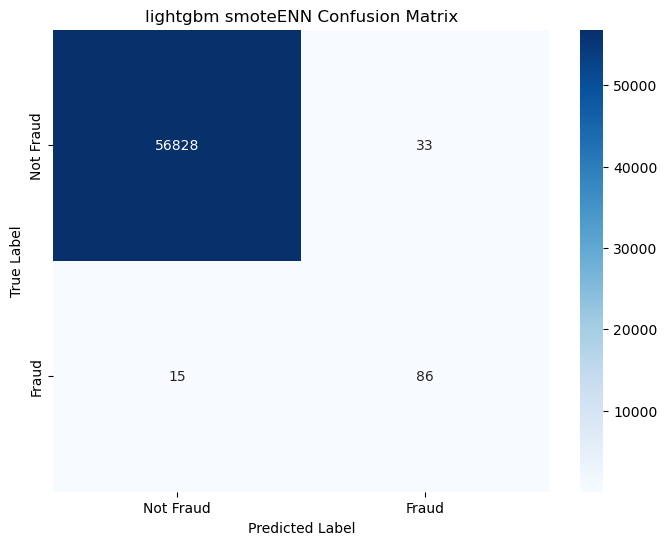

In [6]:
from joblib import load
clf=load("C:\\Users\\Sarrang\\FindDefault\\saved models\\lightgbm_smoteENN_FD.joblib")
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_pred,y_test))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('lightgbm smoteENN Confusion Matrix')
plt.show()


In [12]:
from sklearn.metrics import roc_auc_score
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba_positive = y_pred_proba[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_positive)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9657920365470007


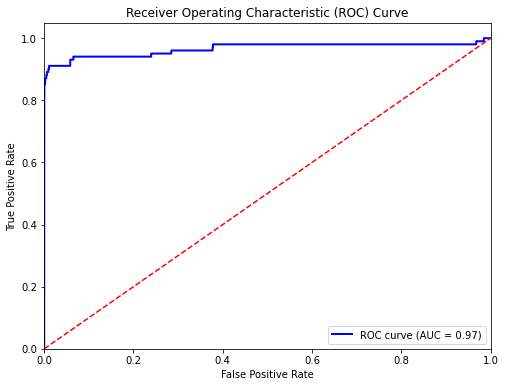

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()